In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

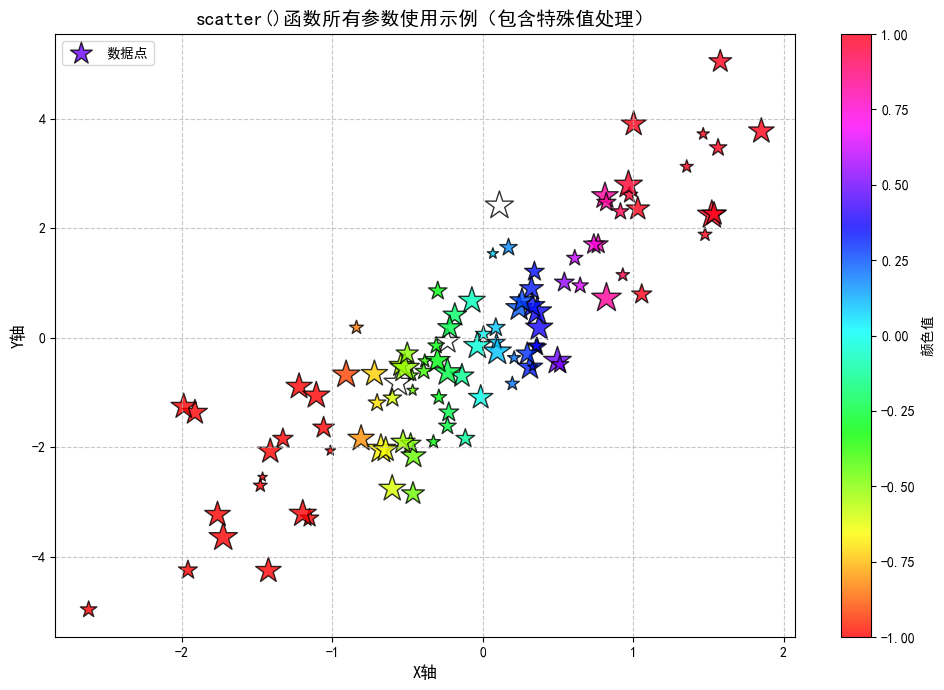

In [3]:
# 生成示例数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
n_points = 100  # 数据点数量

# 生成基础数据
x = np.random.randn(n_points)  # x轴数据（正态分布）
y = 2 * x + np.random.randn(n_points)  # y轴数据（与x相关）

# 生成用于演示不同参数的数据
sizes = np.random.randint(50, 500, n_points)  # 点的大小（50-500之间的随机值）
colors = x.copy()  # 颜色值（取决于x的值）

# 添加一些特殊值（NaN、inf）用于演示plotnonfinite参数
# 
colors[5]  = np.nan      # NaN
colors[15] = np.inf      # 正无穷
colors[25] = -np.inf     # 负无穷

# 准备数据框用于演示data参数
data = {
    'x_data': x,
    'y_data': y
}

# 创建自定义规范化器，在创建时指定vmin和vmax，而不是在scatter函数中
custom_norm = Normalize(vmin=-1, vmax=1)  # 在这里设置vmin和vmax

# 创建图形和轴
fig, ax = plt.subplots(figsize=(10, 7))

# 使用scatter函数绘制散点图
scatter = ax.scatter(
    # 主要数据参数
    x='x_data',  # x轴数据，使用data参数中的键名
    y='y_data',  # y轴数据，使用data参数中的键名
    s=sizes,     # 点的大小
    c=colors,  # 点的颜色
    
    # 标记样式参数
    marker='*',  # 点的形状（星形）
    
    # 颜色映射参数
    cmap='hsv',  # 颜色映射方案
    norm=custom_norm,  # 自定义规范化器，已包含vmin和vmax
    
    # 透明度和边缘参数
    alpha=0.8,   # 点的透明度
    linewidths=1,  # 点边缘线宽
    edgecolors='black',  # 点边缘颜色
    
    # 特殊值处理参数
    plotnonfinite=True,  # 绘制包含无穷大和NaN的值
    
    # 数据来源参数
    data=data,   # 数据来源，允许x和y使用键名
    
    # 其他关键字参数（**kwargs）
    label='数据点',  # 标签，用于图例
)

# 添加颜色条以显示颜色映射
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('颜色值')

# 添加图例、标题和轴标签
ax.legend()
ax.set_title('scatter()函数所有参数使用示例（包含特殊值处理）', fontsize=14)
ax.set_xlabel('X轴', fontsize=12)
ax.set_ylabel('Y轴', fontsize=12)

# 添加网格
ax.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.tight_layout()
plt.show()

# 2、使用示例：

In [4]:
import pandas as pd

# 从网络加载原始Iris数据集
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# 读取数据
df = pd.read_csv(url, header=None, names=column_names)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 示例 1：利用颜色编码引入第三维度

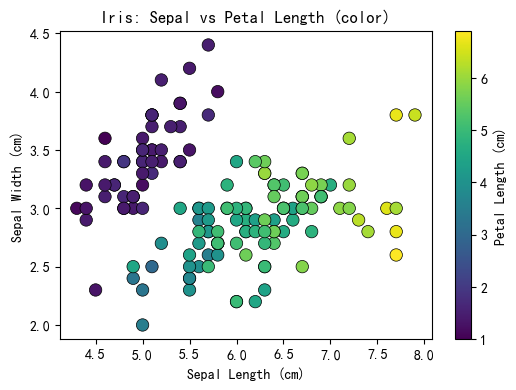

In [5]:
plt.figure(figsize=(6, 4))
scatter = plt.scatter(
    df['sepal_length'],
    df['sepal_width'],
    c=df['petal_length'],        # 第三维度
    cmap='viridis', 
    s=80,
    edgecolors='k',
    linewidths=.5,
    vmin=df['petal_length'].min(), 
    vmax=df['petal_length'].max()
)

cbar = plt.colorbar(scatter , label='Petal Length (cm)')
plt.title("Iris: Sepal vs Petal Length (color)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

### 示例 2：通过点大小编码第四维度

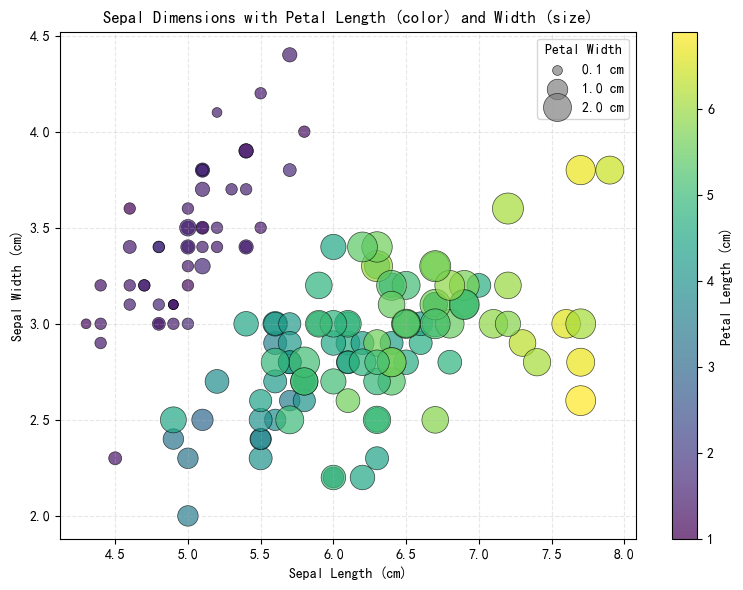

In [6]:
plt.figure(figsize=(8, 6))

# 计算点的大小范围，使大小差异更明显
min_size = 50
max_size = 500
size_range = max_size - min_size
petal_width_min = df['petal_width'].min()
petal_width_max = df['petal_width'].max()

# 将花瓣宽度映射到点大小
point_sizes = min_size + size_range * (df['petal_width'] - petal_width_min) / (petal_width_max - petal_width_min)

scatter = plt.scatter(
    df['sepal_length'],
    df['sepal_width'],
    c=df['petal_length'],        # 第三维度：颜色表示花瓣长度
    s=point_sizes,               # 第四维度：大小表示花瓣宽度
    cmap='viridis', 
    alpha=0.7,                   # 添加透明度以便更好地看到重叠的点
    edgecolors='k',
    linewidths=.5,
    vmin=df['petal_length'].min(), 
    vmax=df['petal_length'].max()
)

# 添加颜色条
cbar = plt.colorbar(scatter, label='Petal Length (cm)')

# 创建图例显示花瓣宽度与点大小的关系
# 选择几个代表性的花瓣宽度值
width_values = [0.1, 1.0, 2.0]
legend_sizes = [min_size + size_range * (w - petal_width_min) / (petal_width_max - petal_width_min) for w in width_values]

# 创建图例
legend_elements = []
for w, s in zip(width_values, legend_sizes):
    legend_elements.append(plt.scatter([], [], s=s, edgecolors='k', linewidths=0.5, 
                                      color='gray', alpha=0.7, label=f'{w} cm'))

# 添加图例
legend = plt.legend(handles=legend_elements, loc='upper right', title='Petal Width', 
                   frameon=True, framealpha=0.8)

plt.title("Sepal Dimensions with Petal Length (color) and Width (size)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

# 添加网格以便更好地读取坐标
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### 示例 3：添加回归线以揭示趋势关系

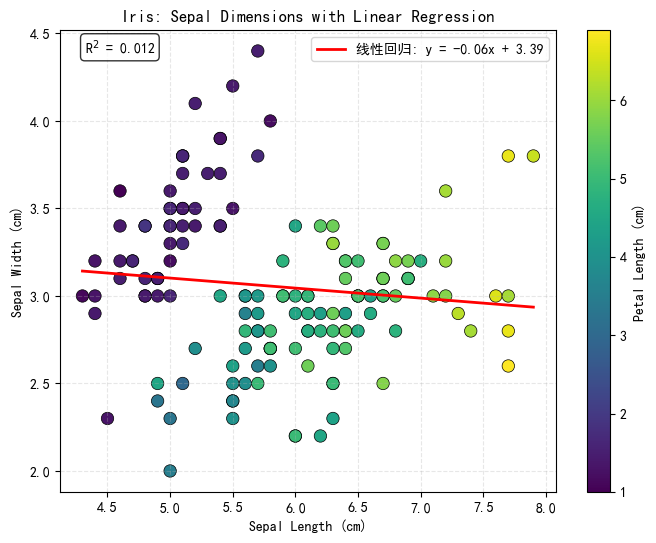

In [7]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(8, 6))

# 创建散点图
scatter = plt.scatter(
    df['sepal_length'],
    df['sepal_width'],
    c=df['petal_length'],        # 第三维度
    cmap='viridis', 
    s=80,
    edgecolors='k',
    linewidths=.5,
    vmin=df['petal_length'].min(), 
    vmax=df['petal_length'].max()
)

# 添加线性回归线
# 准备数据
X = df['sepal_length'].values.reshape(-1, 1)
y = df['sepal_width'].values

# 创建并训练线性回归模型
model = LinearRegression()
model.fit(X, y)

# 生成预测值
x_range = np.linspace(df['sepal_length'].min(), df['sepal_length'].max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))

# 绘制回归线
plt.plot(x_range, y_pred, color='red', linewidth=2, 
         label=f'线性回归: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

# 添加颜色条
cbar = plt.colorbar(scatter, label='Petal Length (cm)')

# 添加图例
plt.legend(loc='upper right')

plt.title("Iris: Sepal Dimensions with Linear Regression")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

# 添加网格
plt.grid(True, linestyle='--', alpha=0.3)

# 显示R²值
r_squared = model.score(X, y)
plt.text(0.05, 0.95, f'R$^2$ = {r_squared:.3f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.show()

### 示例 4：创建带有边际分布的散点图

#### 使用matplotlib

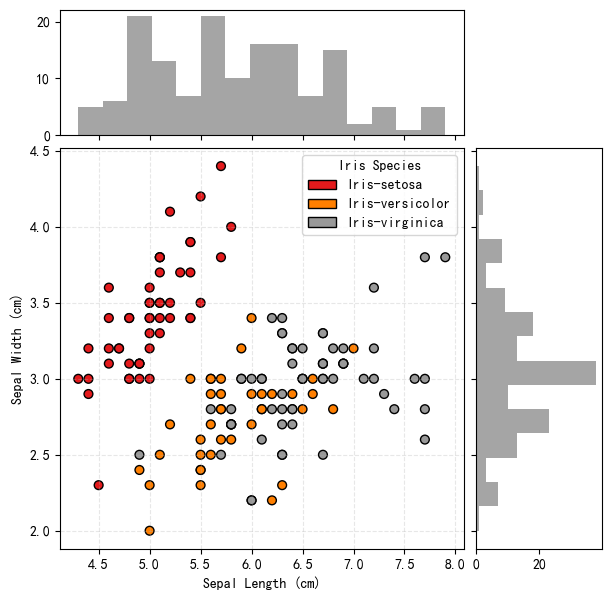

In [8]:
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch

# 把三种鸢尾花映射成 0/1/2
labels, unique = np.unique(df['class'], return_inverse=True)

fig = plt.figure(figsize=(7,7))
# 使用 hspace和wspace参数设置子图间距
gs = GridSpec(4, 4, figure=fig, hspace=0.1, wspace=0.1)

# 主散点
ax_main = fig.add_subplot(gs[1:, :-1])
scatter =ax_main.scatter(df['sepal_length'], df['sepal_width'], c=unique, cmap='Set1', s=40, edgecolors='k')
ax_main.set_xlabel('Sepal Length (cm)')
ax_main.set_ylabel('Sepal Width (cm)')
ax_main.grid(True, linestyle='--', alpha=0.3)

# 上方直方图
ax_top = fig.add_subplot(gs[0, :-1], sharex=ax_main)
ax_top.hist(df['sepal_length'], bins=15, color='tab:gray', alpha=0.7)
ax_top.tick_params(axis='x', labelbottom=False)

# 右侧直方图
ax_right = fig.add_subplot(gs[1:, -1], sharey=ax_main)
ax_right.hist(df['sepal_width'], bins=15, orientation='horizontal', color='tab:gray', alpha=0.7)
ax_right.tick_params(axis='y', labelleft=False)

# 创建图例 - 确保颜色对应
# 使用散点图的to_rgba方法
legend_elements = [
    Patch(
        facecolor=scatter.to_rgba(i),  # 用散点图自带方法获取准确颜色
        edgecolor='black', 
        label=label
    ) 
    for i, label in enumerate(labels)
]
# 添加图例
ax_main.legend(handles=legend_elements, loc='upper right', title='Iris Species')


plt.show()

#### 使用seaborn

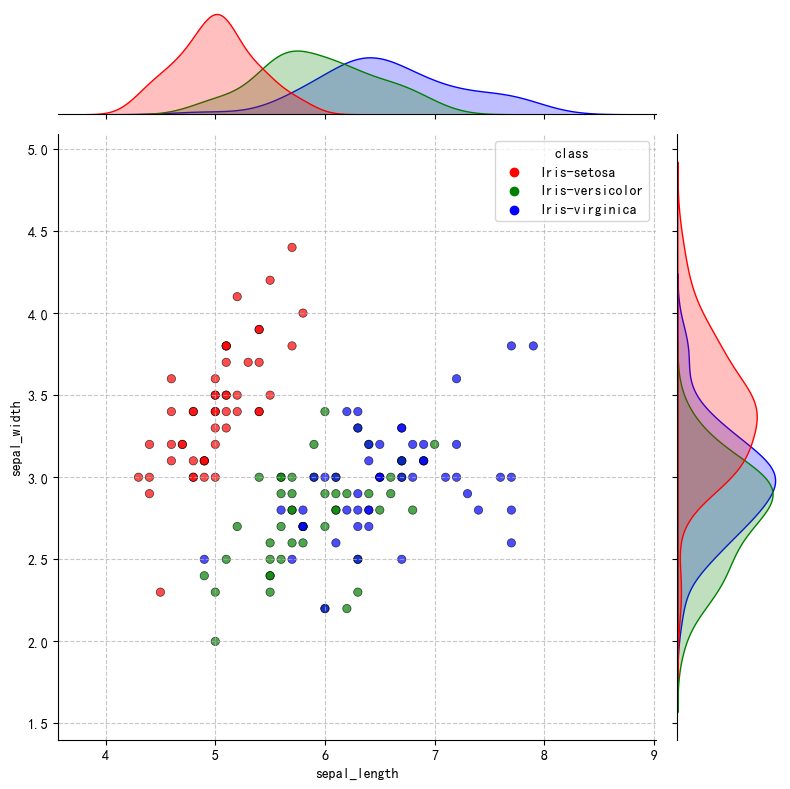

In [9]:
import seaborn as sns

# 创建jointplot
g = sns.jointplot(
    data=df,
    x='sepal_length',
    y='sepal_width',
    hue='class',  # 按种类区分颜色
    palette={'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'},
    height=8,
    alpha=0.7,
    edgecolor='k',
    linewidth=0.5,
)

# 中心散点图添加网格
g.ax_joint.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()